In [21]:
%reload_ext autoreload
%autoreload 2

# Demostration

## 1. CLIP+CosSim

In [1]:
%cd /work/adapting-CLIP-VGPs/

/work/adapting-CLIP-VGPs


In [2]:
from models.vgp_vit import VGPViT
import torch

args = {
    'model': 'vit14',
    'alpha': 0.75,
    'aggregation': 'mean',
    'n_segments': list(range(100, 601, 50)),
    'temperature': 0.02,
    'upsample': 2,
    'start_block': 0,
    'compactness': 50,
    'sigma': 0,
}

model = VGPViT(**args).cuda()
# Freeze all layers
for param in model.parameters():
    param.requires_grad = False

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3509: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3635: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


In [ ]:
list([x[0] for x in model.named_parameters()])

In [ ]:
from PIL import Image
import numpy as np

img_path = 'data/flickr/flickr30k_images/1000268201.jpg'
img = Image.open(img_path).convert("RGB")
img_data = np.array(img)

img.show()

In [ ]:
'''
Captions:
1000268201.jpg| 0| A child in a pink dress is climbing up a set of stairs in an entry way .
1000268201.jpg| 1| A little girl in a pink dress going into a wooden cabin .
1000268201.jpg| 2| A little girl climbing the stairs to her playhouse .
1000268201.jpg| 3| A little girl climbing into a wooden playhouse 
1000268201.jpg| 4| A girl going into a wooden building .
'''
phrases = ['playhouse', 'building']


In [ ]:
heatmaps = model(img_data, phrases)

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(heatmaps[0])
plt.axis('off')

In [ ]:
plt.imshow(heatmaps[1])
plt.axis('off')

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# plt.imshow(np.abs(heatmaps[0]-heatmaps[1]))
# mask = np.abs(heatmaps[0]-heatmaps[1]) > 0.5
# np.sum(mask)

similarity_score = cosine_similarity(heatmaps[0].reshape(1, -1), heatmaps[1].reshape(1, -1))[0, 0]
print(similarity_score)

In [ ]:
import numpy as np
from scipy.special import kl_div
from scipy.stats import entropy

def kl_divergence(p, q):
    # Compute the KL divergence between two probability distributions p and q
    kl_divergence = entropy(p, q)
    return kl_divergence

# Normalize the attention maps to be probability distributions (sum to 1)
attention_map1, attention_map2 = heatmaps
attention_map1 = attention_map1 / np.sum(attention_map1)
attention_map2 = attention_map2 / np.sum(attention_map2)

# Calculate the KL divergence between the two attention maps
kl_div_value = kl_divergence(attention_map1, attention_map2)

print(f"KL Divergence between the two attention maps: {kl_div_value<0.1}")


In [ ]:
import cv2
import numpy as np
from skimage import metrics

def compare_heatmaps(heatmap1, heatmap2):
    # Ensure both heatmaps have the same dimensions
    if heatmap1.shape != heatmap2.shape:
        raise ValueError("Heatmaps must have the same dimensions")

    # # Convert heatmaps to 8-bit images (scaling them between 0 and 255)
    # heatmap1_scaled = cv2.normalize(heatmap1, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    # heatmap2_scaled = cv2.normalize(heatmap2, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

    # Compute SSIM
    ssim = metrics.structural_similarity(heatmap1, heatmap2)

    # Compute MSE
    mse = np.mean((heatmap1 - heatmap2) ** 2)

    return ssim, mse

# Load your heatmaps (replace 'heatmap1.png' and 'heatmap2.png' with your actual file paths)
heatmap1, heatmap2 = heatmaps

# Compare the heatmaps
ssim, mse = compare_heatmaps(heatmap1, heatmap2)
print(ssim, mse)

# You can set a threshold for similarity, depending on your requirements
threshold_ssim = 0.9
threshold_mse = 1000

if ssim >= threshold_ssim and mse <= threshold_mse:
    print("The heatmaps describe the same object.")
else:
    print("The heatmaps describe different objects.")



In [ ]:
img_path = 'data/flickr/flickr30k_images/1016887272.jpg'
img = Image.open(img_path).convert("RGB")
img_data = np.array(img)
# img.show()

phrases = ['Several climbers', 'A group of people']
heatmaps = model(img_data, phrases)

import matplotlib.pyplot as plt

plt.imshow(heatmaps[0])
plt.axis('off')

In [ ]:
plt.imshow(heatmaps[1])
plt.axis('off')

from sklearn.metrics.pairwise import cosine_similarity

similarity_score = cosine_similarity(heatmaps[0].reshape(1, -1), heatmaps[1].reshape(1, -1))[0, 0]
print(similarity_score)

In [ ]:
img_path = 'data/flickr/flickr30k_images/1016887272.jpg'
img = Image.open(img_path).convert("RGB")
img_data = np.array(img)
# img.show()

phrases = ['the beach', 'the ocean']
heatmaps = model(img_data, phrases)

import matplotlib.pyplot as plt

plt.imshow(heatmaps[0])
plt.axis('off')

In [ ]:
plt.imshow(heatmaps[1])
plt.axis('off')

from sklearn.metrics.pairwise import cosine_similarity

similarity_score = cosine_similarity(heatmaps[0].reshape(1, -1), heatmaps[1].reshape(1, -1))[0, 0]
print(similarity_score)

In [ ]:
img_path = 'data/flickr/flickr30k_images/1016887272.jpg'
img = Image.open(img_path).convert("RGB")
img_data = np.array(img)
# img.show()

phrases = ['Two children', 'Two young , wet boys']
heatmaps = model(img_data, phrases)

import matplotlib.pyplot as plt

plt.imshow(heatmaps[0])
plt.axis('off')

In [ ]:
plt.imshow(heatmaps[1])
plt.axis('off')

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_score = cosine_similarity(heatmaps[0].reshape(1, -1), heatmaps[1].reshape(1, -1))[0, 0]
print(similarity_score)

## 2. CLIP+CNN

In [1]:
%cd /work/adapting-CLIP-VGPs/

from models.vgp_vit import VGPViT
import torch

args = {
    'model': 'vit14',
    'alpha': 0.75,
    'aggregation': 'mean',
    'n_segments': list(range(100, 601, 50)),
    'temperature': 0.02,
    'upsample': 2,
    'start_block': 0,
    'compactness': 50,
    'sigma': 0,
}

# from PIL import Image
# import numpy as np

# img_path = 'data/flickr/flickr30k_images/1000268201.jpg'
# img = Image.open(img_path).convert("RGB").resize((224,224))
# img_data = np.array(img)

# img.show()

# '''
# Captions:
# 1000268201.jpg| 0| A child in a pink dress is climbing up a set of stairs in an entry way .
# 1000268201.jpg| 1| A little girl in a pink dress going into a wooden cabin .
# 1000268201.jpg| 2| A little girl climbing the stairs to her playhouse .
# 1000268201.jpg| 3| A little girl climbing into a wooden playhouse 
# 1000268201.jpg| 4| A girl going into a wooden building .
# '''
# phrases = ['girl', 'child']

/work/adapting-CLIP-VGPs


In [2]:
from utils.vgp_data import FlickrVGPsDataset
from torch.utils.data import DataLoader

train_dataset = FlickrVGPsDataset(data_type='train')

In [4]:
import clip

phrase1 = clip.tokenize(['Two people']).cuda()
phrase2 = clip.tokenize(['A group of people']).cuda()
print(phrase1)
print(phrase2)

pairx = torch.cat((phrase1, phrase2), dim=0)
pairy = clip.tokenize(['Two people', 'A group of people']).cuda()
print(pairx)
print(pairy)

tensor([[49406,  1237,  1047, 49407,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0]], device='cuda:0',
       dtype=torch.int32)
tensor([[49406,   320,  1771,   539,  1047, 49407,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0

In [34]:
torch.manual_seed(0)
batch_size = 100

train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=0,
    pin_memory=True
)

batch_iter = iter(train_loader)
batch = next(batch_iter)
indices = batch['idx']
images = batch['image']
phrase_pairs = [list(phrase_pair) for phrase_pair in zip(batch['phrases'][0],batch['phrases'][1])]
labels = batch['label']

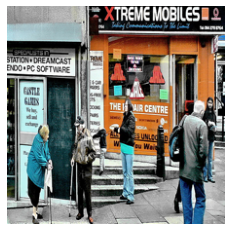

In [4]:
import matplotlib.pyplot as plt

def show(img_tensor):
    # Assuming img_data is your uint8 PyTorch tensor image
    if torch.is_tensor(img_tensor) and img_tensor.dtype == torch.uint8:
        # Convert the tensor to a NumPy array and normalize if necessary
        img_array = img_tensor.numpy()

        # If the image has channels (e.g., RGB), transpose the dimensions
        if img_array.shape[0] == 3:
            img_array = img_array.transpose(1, 2, 0)

        # Display the image using matplotlib
        plt.imshow(img_array)
        plt.axis('off')
        plt.show()
    else:
        print("Invalid image data.")

show(images[0])

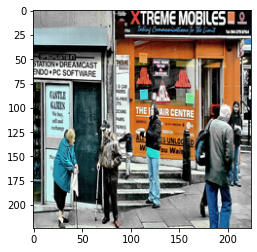

In [5]:
img = images[0]
phrases = phrase_pairs[0]

# print(img, phrases)
from skimage.segmentation import slic
import numpy as np

def get_masks(im):
    masks = []

    n_segments = list(range(100, 601, 50))
    compactness = 50
    sigma = 0

    # Do SLIC with different number of segments so that it has a hierarchical scale structure
    # This can average out spurious activations that happens sometimes when the segments are too small
    for n in n_segments:
        segments_slic = slic(im.astype(
            np.float32)/255., n_segments=n, compactness=compactness, sigma=sigma)
        for i in np.unique(segments_slic):
            mask = segments_slic == i
            masks.append(mask)
    masks = np.stack(masks, 0)
    return masks

show(img)

In [9]:
vit, preprocess = clip.load(
                "ViT-L/14",
                device=0    
            )

In [15]:
from PIL import Image

prep = preprocess(Image.fromarray(img.cpu().numpy()))


tensor(-1.7923)

In [6]:
map_model = VGPViT(**args).cuda()
heatmaps = map_model(img, phrases)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3509: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3635: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
/work/adapting-CLIP-VGPs/models/vgp_vit.py:54: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  np.float32)/255., n_segments=n, compactness=self.compactness, sigma=self.sigma)


Two people


(-0.5, 223.5, 223.5, -0.5)

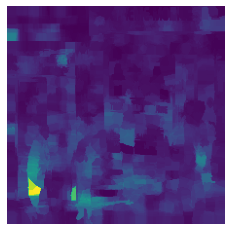

In [10]:
print(phrases[0])
plt.imshow(heatmaps[0])
plt.axis('off')

A group of people


(-0.5, 223.5, 223.5, -0.5)

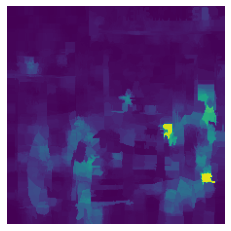

In [11]:
print(phrases[1])
plt.imshow(heatmaps[1])
plt.axis('off')

In [5]:
import torch.nn as nn
import torch.nn.functional as F

class HeatMapsComparator(nn.Module):
    def __init__(self, pretrained_model):
        print('Init CNN comparator')
        super(HeatMapsComparator, self).__init__()
        # Define the convolutional layers
        self.conv1 = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 112 * 112 * 2, 128)
        self.fc2 = nn.Linear(128, 1)
        self.sigmoid = nn.Sigmoid()
        self.map_model = pretrained_model
        self.thres = nn.Parameter(torch.tensor([0.5]))
    
    def predict(self, x):
        return x > self.thres

    def forward(self, img, phrases):
        x1,x2 = self.map_model(img, phrases)
        # Convert NumPy arrays to PyTorch tensors
        x1 = torch.from_numpy(x1).unsqueeze(0).unsqueeze(0).cuda()
        x2 = torch.from_numpy(x2).unsqueeze(0).unsqueeze(0).cuda()
        x1 = self.pool(self.relu(self.conv1(x1)))
        x2 = self.pool(self.relu(self.conv1(x2)))
        x1 = x1.view(-1, 64 * 112 * 112)
        x2 = x2.view(-1, 64 * 112 * 112)
        x = torch.cat((x1, x2), dim=1)
        x = self.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

In [6]:
map_model = VGPViT(**args).cuda()
for param in map_model.parameters():
    param.requires_grad = False
model = HeatMapsComparator(map_model).cuda()

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3509: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3635: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


Init CNN comparator


In [ ]:
map_model = VGPViT(**args).cuda()
heatmaps = map_model(img, phrases)

In [14]:
from tqdm import tqdm
outputs = [model(image, phrases) for image, phrases in tqdm(zip(images, phrase_pairs))]

0it [00:00, ?it/s]/work/adapting-CLIP-VGPs/models/vgp_vit.py:54: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  np.float32)/255., n_segments=n, compactness=self.compactness, sigma=self.sigma)
100it [01:31,  1.10it/s]


In [44]:
output_tensor = torch.cat(outputs)
output_tensor

tensor([[0.5018],
        [0.5061],
        [0.5039],
        [0.5092],
        [0.5058],
        [0.5120],
        [0.5018],
        [0.5025],
        [0.5035],
        [0.5054],
        [0.5060],
        [0.5070],
        [0.5018],
        [0.5035],
        [0.5060],
        [0.5013],
        [0.5030],
        [0.5050],
        [0.5042],
        [0.5062],
        [0.5024],
        [0.5042],
        [0.5042],
        [0.5024],
        [0.5040],
        [0.5019],
        [0.5058],
        [0.5020],
        [0.5052],
        [0.5020],
        [0.5082],
        [0.5095],
        [0.5098],
        [0.5037],
        [0.5121],
        [0.5063],
        [0.5063],
        [0.5082],
        [0.5080],
        [0.5053],
        [0.5105],
        [0.5075],
        [0.5101],
        [0.5087],
        [0.5079],
        [0.5127],
        [0.5065],
        [0.5090],
        [0.5091],
        [0.5126],
        [0.5122],
        [0.5067],
        [0.5078],
        [0.5103],
        [0.5099],
        [0

In [45]:
label_tensor = labels.float().unsqueeze(1).cuda()
label_tensor

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
      

In [46]:
import torch.nn as nn

criterion = nn.BCEWithLogitsLoss()

loss = criterion(output_tensor, label_tensor)

In [54]:
loss.item()

0.9026926159858704

In [53]:
preds = torch.tensor([model.predict(output) for output in outputs])
torch.sum(preds)

tensor(100)

# Evaluation

In [ ]:
import pandas as pd
from sklearn.metrics import recall_score

demo_res = pd.read_csv('/work/adapting-CLIP-VGPs/data/flickr/demo_results.csv')
pred = demo_res['pred']

FP = (pred==True).sum()
FN = len(pred) - FP

test_set = pd.read_csv('/work/adapting-CLIP-VGPs/data/flickr/phrases_data/phrase_pair_remove_trivial_match_test.csv')
ytrue = test_set['ytrue']
TP = (ytrue==True).sum() - FN
TN = len(ytrue) - TP - FN - FP

Confusion_matrix = [[TN, FP], [FN, TP]]

prec = TP/(TP+FP)
rec = TP/(TP+FN)
f1 = 2*(prec*rec)/(prec+rec)

print(f'Prec = {prec}')
print(f'Rec = {rec}')
print(f'F1-score = {f1}')

In [ ]:
import pandas as pd
from sklearn.metrics import recall_score

val_results = pd.read_csv('/work/adapting-CLIP-VGPs/data/flickr/test_results.csv')
pred = val_results['pred']
gt = val_results['gt']

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Replace actual_labels and predicted_labels with your own data
cm = confusion_matrix(gt, pred)

# Define class labels
class_labels = ['Negative', 'Positive']

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, cbar=False)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision
precision = precision_score(gt, pred)

# Calculate recall
recall = recall_score(gt, pred)

# Calculate F1 score
f1 = f1_score(gt, pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


In [ ]:
import pandas as pd
from sklearn.metrics import recall_score

val_results = pd.read_csv('/work/adapting-CLIP-VGPs/data/flickr/val_results.csv')
pred = val_results['pred']
gt = val_results['gt']

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Replace actual_labels and predicted_labels with your own data
cm = confusion_matrix(gt, pred)

# Define class labels
class_labels = ['Negative', 'Positive']

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, cbar=False)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



# Analys

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision
precision = precision_score(gt, pred)

# Calculate recall
recall = recall_score(gt, pred)

# Calculate F1 score
f1 = f1_score(gt, pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


In [ ]:
sns.displot(
    val_results,
    x="sim_score",
    bins=20,
    hue="gt",
    # multiple="stack"
)

In [ ]:
print(len(val_results[(val_results['sim_score']<=0.7) & (val_results['gt']==True)]))

In [ ]:
demo_res = pd.read_csv('/work/adapting-CLIP-VGPs/data/flickr/demo_results.csv')

failed_cases = demo_res[(demo_res['gt'] == True) & (demo_res['pred'] == False)]

print(failed_cases)

In [ ]:
# Replace 'column_name' with the name of your column
column_name = 'sim_score'

# Create a histogram
plt.hist(failed_cases[column_name], bins=20, color='skyblue', edgecolor='black')  # You can adjust the number of bins and color

# Set labels and title
plt.xlabel('Cosine similarity score')
plt.ylabel('Number of failed queries')
plt.title(f'Distribution of Sim_score in failed VGP dectection')

# Show the plot
plt.show()


In [ ]:
val_results = pd.read_csv('/work/adapting-CLIP-VGPs/data/flickr/val_results.csv')
nonVGP_cases = val_results[val_results['gt'] == False]

# Replace 'column_name' with the name of your column
column_name = 'sim_score'

# Create a histogram
plt.hist(nonVGP_cases[column_name], bins=20, color='skyblue', edgecolor='black')  # You can adjust the number of bins and color

# Set labels and title
plt.xlabel('Cosine similarity score')
plt.ylabel('Number of failed queries')
plt.title(f'Distribution of Sim_score in non-VGP cases')

# Show the plot
plt.show()

In [ ]:
dataset = pd.read_csv('/work/adapting-CLIP-VGPs/data/flickr/phrases_data/phrase_pair_remove_trivial_match_test.csv')
# print(dataset)
failed_samples = pd.merge(failed_cases, dataset[['Unnamed: 0','image']], left_on='dataset_idx', right_on='Unnamed: 0', how='inner')
print(failed_samples[:2])

In [ ]:
import random

random.seed(0)
num_samples = 10
selected_unique_values = random.sample(list(failed_samples['image'].unique()), num_samples)
# print(selected_unique_values)

random_samples = failed_samples[failed_samples['image'].isin(selected_unique_values)]
print(random_samples[:3])

In [ ]:
from PIL import Image
import numpy as np
import pandas as pd
from models.vgp_vit import VGPViT

args = {
    'model': 'vit14',
    'alpha': 0.75,
    'aggregation': 'mean',
    'n_segments': list(range(100, 601, 50)),
    'temperature': 0.02,
    'upsample': 2,
    'start_block': 0,
    'compactness': 50,
    'sigma': 0,
}

model = VGPViT(**args).cuda()

In [ ]:
from tqdm import tqdm
import ast

images = random_samples['image']
phrases = [ast.literal_eval(txtpair) for txtpair in random_samples['phrases']]
sim_scores = random_samples['sim_score']

for imgidx, txtpair, sim_score in tqdm(zip(images, phrases, sim_scores)):
    # print(sample)
    img_path = f'data/flickr/flickr30k_images/{imgidx}.jpg'
    img = Image.open(img_path).convert("RGB")
    
    img_data = np.array(img)

    heatmaps = model(img_data, txtpair)
    
    # img.resize((224, 224)).show()
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))  # Adjust the figure size as needed
    # Plot the first array on the first subplot
    ax1.imshow(np.array(img.resize((224,224))))
    ax1.set_title('Input image')
    # Remove the subplot grid
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])

    # Plot the first array on the first subplot
    ax2.imshow(heatmaps[0])
    ax2.set_title(txtpair[0])
    # Remove the subplot grid
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.set_xticklabels([])
    ax2.set_yticklabels([])

    # Plot the second array on the second subplot
    ax3.imshow(heatmaps[1])
    ax3.set_title(txtpair[1])
    # Remove the subplot grid
    ax3.set_xticks([])
    ax3.set_yticks([])
    ax3.set_xticklabels([])
    ax3.set_yticklabels([])

    # Show the combined plot
    # plt.tight_layout()
    fig.suptitle(f'Heatmaps cos similarity = {sim_score}').set_position([0.5, 0])
    plt.show()
    
    # size = 224
    # spaceBetween = 100
    # combined_image = Image.new('RGB', (size*3 + int(spaceBetween*1.5), size))
    # combined_image.paste(img.resize((224, 224)), (0, 0))
    # combined_image.paste(heatmap1, (size+spaceBetween, 0))
    # combined_image.paste(heatmap2, (size*2+int(spaceBetween*1.5), 0))

    # heatmap_samples.append([img_idx, phrases, combined_image])
    